# **New York City Yellow Taxi Data**

## **Author : Vishvadeepak Tewari**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings



In [975]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import calendar

In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [8]:
# Try loading one file

df = pd.read_parquet('../DatasetsAndDictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('../DatasetsAndDictionary/trip_records/')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthDf = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in range(0, 32):
            for hour in range(0, 25):
                hour_data = monthDf[(monthDf['tpep_pickup_datetime'].dt.day == date) & (monthDf['tpep_pickup_datetime'].dt.hour == hour)]

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac = 0.05, random_state = 42)

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([sampled_data, df])# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [14]:
# Store the df in csv/parquet
print(df.shape)
df.to_parquet('/Users/vishvadeepak/Documents/upgrad/DatasetsAndDictionary/sampled_data')

(1896420, 20)


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [847]:
# Load the new data file
df = pd.read_parquet('/Users/vishvadeepak/Documents/upgrad/DatasetsAndDictionary/sampled_data')
df.shape

(1896420, 20)

In [848]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1996         1  2023-06-01 00:25:11   2023-06-01 00:28:50              1.0   
850          1  2023-06-01 00:49:00   2023-06-01 01:02:09              1.0   
1392         2  2023-06-01 00:19:11   2023-06-01 00:32:13              5.0   
1008         2  2023-06-01 00:22:21   2023-06-01 00:42:06              5.0   
1848         2  2023-06-01 00:06:20   2023-06-01 00:31:41              1.0   

      trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1996           0.80         1.0                  N           113   
850            5.60         1.0                  N           132   
1392           4.99         1.0                  N           141   
1008           6.60         1.0                  N           170   
1848           7.02         1.0                  N           263   

      DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
1996           211             2          5.8   3.50      0.5        0.00   
850            197             2         24.0   2.75      0.5        0.00   
1392             4             1         22.6   1.00      0.5        5.52   
1008            97             1         30.3   1.00      0.5        8.82   
1848           243             1         33.8   1.00      0.5        7.76   

      tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
1996           0.0                    1.0         10.80                   2.5   
850            0.0                    1.0         28.25                   0.0   
1392           0.0                    1.0         33.12                   2.5   
1008           0.0                    1.0         44.12                   2.5   
1848           0.0                    1.0         46.56                   2.5   

      Airport_fee  airport_fee  
1996         0.00          NaN  
850          1.75          NaN  
1392         0.00          NaN  
1008         0.00          NaN  
1848         0.00          NaN

In [849]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896420 entries, 1996 to 3196303
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [855]:
# Fix the index and drop any columns that are not needed
df.drop('store_and_fwd_flag', axis = 1, inplace=True)
df.set_index('VendorID', inplace=True)
df.shape


(1896420, 18)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [858]:
# Combine the two airport fee columns
df['airport_fee'] = df.apply(lambda x : x['Airport_fee'] if pd.isnull(x['airport_fee']) else x['airport_fee'], axis = 1)
df.drop('Airport_fee', axis = 1, inplace=True)
df.shape


(1896420, 17)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [860]:
# check where values of fare amount are negative
df[df['fare_amount'] < 0]

Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [862]:
# Analyse RatecodeID for the negative fare amounts
# None of the values of fare amount are negative


In [863]:
# Find which columns have negative values
df.describe().loc['min']

tpep_pickup_datetime     2001-01-01 00:06:49
tpep_dropoff_datetime    2001-01-01 15:42:11
passenger_count                          0.0
trip_distance                            0.0
RatecodeID                               1.0
PULocationID                             1.0
DOLocationID                             1.0
payment_type                             0.0
fare_amount                              0.0
extra                                   -2.5
mta_tax                                 -0.5
tip_amount                               0.0
tolls_amount                             0.0
improvement_surcharge                   -1.0
total_amount                           -5.75
congestion_surcharge                    -2.5
airport_fee                            -1.75
Name: min, dtype: object

In [864]:
# fix these negative values
non_negative_or_null_fn = lambda x : pd.isna(x) or x >=0

df = df[(df['total_amount'].apply(non_negative_or_null_fn)) & (df['extra'].apply(non_negative_or_null_fn)) & 
(df['mta_tax'].apply(non_negative_or_null_fn)) & (df['improvement_surcharge'].apply(non_negative_or_null_fn)) & 
(df['congestion_surcharge'].apply(non_negative_or_null_fn)) & (df['airport_fee'].apply(non_negative_or_null_fn))]
df.shape

(1896339, 17)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [867]:
# Find the proportion of missing values in each column
df.isna().sum()


tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          64875
trip_distance                0
RatecodeID               64875
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64875
airport_fee              64875
dtype: int64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [869]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
default_pax_count = df['passenger_count'].mode()[0]
print(default_pax_count)
df['passenger_count'] = df['passenger_count'].fillna(default_pax_count)

1.0


Did you find zeroes in passenger_count? Handle these.

In [871]:
print(df[df['passenger_count'] == 0].shape)
df.loc[df['passenger_count'] == 0, 'passenger_count'] = default_pax_count
df.shape

(29683, 17)


(1896339, 17)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [873]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [875]:
# handle null values in congestion_surcharge
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(df['congestion_surcharge'].mean())


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [900]:
# Handle any remaining missing values
df['airport_fee'] = df['airport_fee'].fillna(df['airport_fee'].mean())
df.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [1640]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()

tpep_pickup_datetime       tpep_dropoff_datetime  \
count                     1875404                     1875404   
mean   2023-07-02 18:16:45.275440  2023-07-02 18:34:19.033534   
min           2001-01-01 00:06:49         2001-01-01 15:42:11   
25%           2023-04-02 15:13:58  2023-04-02 15:34:56.750000   
50%           2023-06-27 13:53:16  2023-06-27 14:14:32.500000   
75%    2023-10-06 19:25:27.500000  2023-10-06 19:42:20.750000   
max           2024-01-01 00:01:34         2024-01-01 20:50:55   
std                           NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.875404e+06   1.875404e+06  1.875404e+06  1.875404e+06   
mean      1.372125e+00   3.471356e+00  1.058227e+00  1.652538e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.070000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.800000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.430000e+00  1.000000e+00  2.340000e+02   
max       6.000000e+00   5.275000e+01  6.000000e+00  2.650000e+02   
std       8.645421e-01   4.484678e+00  3.178082e-01  6.394978e+01   

       DOLocationID  payment_type   fare_amount         extra  ...  \
count  1.875404e+06  1.875404e+06  1.875404e+06  1.875404e+06  ...   
mean   1.639695e+02  1.192254e+00  1.968872e+01  1.595884e+00  ...   
min    1.000000e+00  1.000000e+00  1.000000e-02  0.000000e+00  ...   
25%    1.130000e+02  1.000000e+00  9.300000e+00  0.000000e+00  ...   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  ...   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  ...   
max    2.650000e+02  4.000000e+00  7.863000e+02  2.080000e+01  ...   
std    6.979195e+01  4.491656e-01  1.745733e+01  1.830550e+00  ...   

       improvement_surcharge  total_amount  congestion_surcharge  \
count           1.875404e+06  1.875404e+06          1.875404e+06   
mean            9.993336e-01  2.874823e+01          2.320094e+00   
min             0.000000e+00  1.010000e+00          0.000000e+00   
25%             1.000000e+00  1.600000e+01          2.500000e+00   
50%             1.000000e+00  2.100000e+01          2.500000e+00   
75%             1.000000e+00  3.072000e+01          2.500000e+00   
max             1.000000e+00  7.905500e+02          2.500000e+00   
std             2.307718e-02  2.208303e+01          6.342353e-01   

        airport_fee   pickup_hour  dropoff_hour  pickup_weekday  pickup_month  \
count  1.875404e+06  1.875404e+06  1.875404e+06    1.875404e+06  1.875404e+06   
mean   1.423521e-01  1.427532e+01  1.432048e+01    3.002276e+00  6.538478e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00    0.000000e+00  1.000000e+00   
25%    0.000000e+00  1.100000e+01  1.100000e+01    1.000000e+00  4.000000e+00   
50%    0.000000e+00  1.500000e+01  1.500000e+01    3.000000e+00  6.000000e+00   
75%    0.000000e+00  1.900000e+01  1.900000e+01    5.000000e+00  1.000000e+01   
max    1.750000e+00  2.300000e+01  2.300000e+01    6.000000e+00  1.200000e+01   
std    4.560005e-01  5.802688e+00  5.918591e+00    1.928469e+00  3.467159e+00   

       trip_duration_in_mins  fare_per_mile  
count           1.875404e+06   1.875404e+06  
mean            1.756263e+01            inf  
min             1.666667e-02   2.717391e-04  
25%             7.800000e+00   5.641026e+00  
50%             1.278333e+01   7.153846e+00  
75%             2.080000e+01   9.113924e+00  
max             5.522433e+03            inf  
std             4.074095e+01            NaN  

[8 rows x 23 columns]

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [909]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [911]:
# Continue with outlier handling
# removing rows where drop off time is either negative or 0
df = df[(df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() > 0]


In [913]:
# Do any columns need standardising?
df = df[df['trip_distance'] < 250]
df.shape

(1895441, 17)

In [915]:
# since trip distance 99.99 percentile is much less than 250 removing those as well
df = df[df['trip_distance'] < np.percentile(df['trip_distance'], 99.99)]
df.shape

(1895251, 17)

In [917]:
# payment_type == 0 can be populated with mode value of payment type

df.loc[df['payment_type'] == 0, 'payment_type'] = df['payment_type'].mode()[0]

In [919]:
#RateCodeId can be only 1,2,3,4,5,6 , hence populating the value with mode of rateCodeId
df.loc[~df['RatecodeID'].isin([1,2,3,4,5,6]), 'RatecodeID'] = df[df['RatecodeID'].isin([1,2,3,4,5,6])]['RatecodeID'].mode()[0]
# df['RatecodeID'].value_counts()

In [920]:
# remove all entries where tripdistance and fare amount is 0 and pickup and drop off locations are not same
df = df[~((df['trip_distance'] == 0) & (df['PULocationID'] != df['DOLocationID']) & (df['fare_amount'] == 0))]

In [921]:
# remove all entries where tripdistance and pickup and drop off locations are also same
df = df[~((df['trip_distance'] == 0) & (df['PULocationID'] == df['DOLocationID']))]

In [924]:
# remove all entries where trip_distance is non zero and fareAmount/tripDistance is more than 99.9 percentile
nonZeroDistanceDf = df[df['trip_distance'] > 0]
fare_per_distance_threshold = np.percentile(nonZeroDistanceDf['fare_amount']/nonZeroDistanceDf['trip_distance'], 99.9)
print('threshold for fares per miles', fare_per_distance_threshold)
df = df[(df['trip_distance'] == 0) | (df['fare_amount']/df['trip_distance'] < fare_per_distance_threshold)]

threshold for fares per miles 499.99999999999994


In [926]:
# remove all entries where fareamount == 0
df = df[df['fare_amount'] > 0]
df.shape

(1877283, 17)

In [929]:
# remove all entries where tip_amount and fare_amount ratio is more than 99.9 percentile of the same
tip_per_fare_threshold = np.percentile(df['tip_amount']/df['fare_amount'],99.9)
df = df[df['tip_amount']/df['fare_amount'] < tip_per_fare_threshold]
df.shape

(1875404, 17)

airport_fee
0.00000    1652853
1.75000     119300
0.14292      64016
1.25000      39234
1.00000          1
Name: count, dtype: int64

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [933]:
df.columns.tolist()

['tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [945]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour
df['pickup_weekday'] = df['tpep_pickup_datetime'].dt.weekday
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

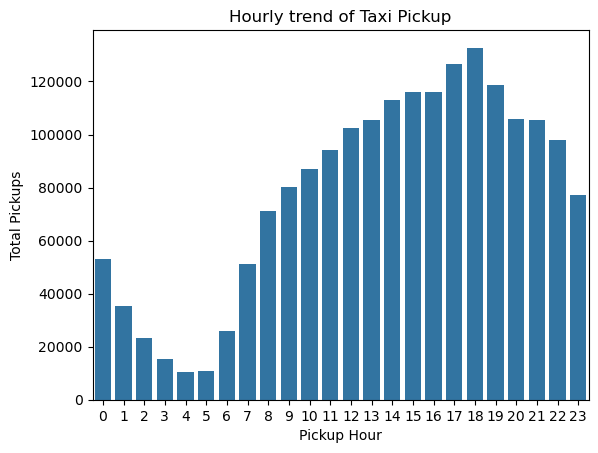

In [959]:
# Find and show the hourly trends in taxi pickups
sns.barplot(df.groupby(by='pickup_hour').aggregate(total_pickup = ('tpep_pickup_datetime', 'count')), x= 'pickup_hour', 
            y = 'total_pickup')
plt.title('Hourly trend of Taxi Pickup')
plt.xlabel('Pickup Hour')
plt.ylabel('Total Pickups')
plt.show()

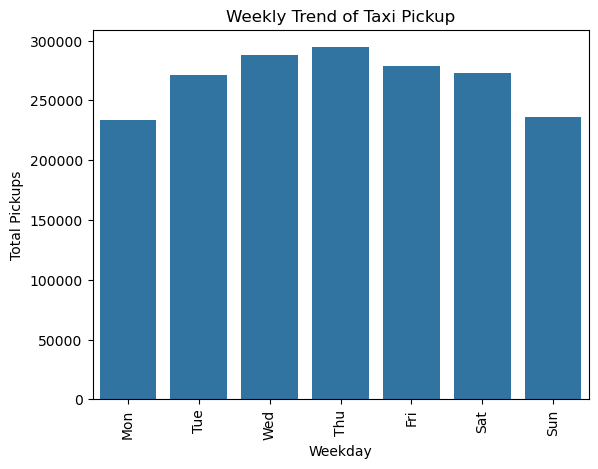

In [1795]:
# Find and show the daily trends in taxi pickups (days of the week)
sns.barplot(df.groupby(by='pickup_weekday').aggregate(total_pickup = ('tpep_pickup_datetime', 'count')), x= 'pickup_weekday', 
            y = 'total_pickup')
plt.title('Weekly Trend of Taxi Pickup')
plt.xlabel('Weekday')
plt.xticks(ticks=range(7), labels=calendar.day_abbr, rotation = 90)
plt.ylabel('Total Pickups')
plt.show()

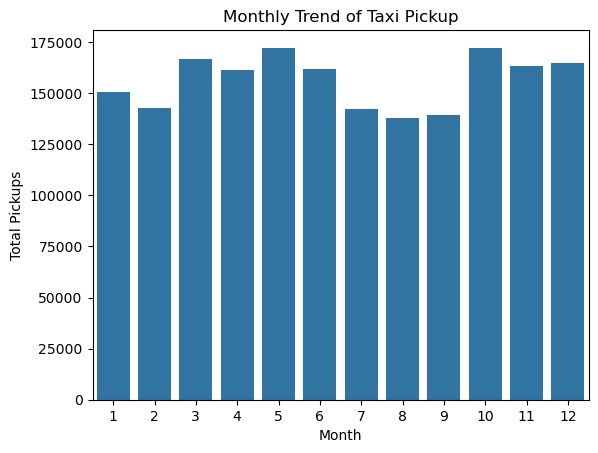

In [1745]:
# Show the monthly trends in pickups
sns.barplot(df.groupby(by='pickup_month').aggregate(total_pickup = ('tpep_pickup_datetime', 'count')), x= 'pickup_month', 
            y = 'total_pickup')
plt.title('Monthly Trend of Taxi Pickup')
plt.xlabel('Month')
plt.ylabel('Total Pickups')
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [1031]:
# Analyse the above parameters
df[df['trip_distance'] == 0].shape

(21169, 21)

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [1033]:
# Create a df with non zero entries for the selected parameters.
financial_df = df[df['trip_distance'] > 0]
financial_df.shape


(1854235, 21)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

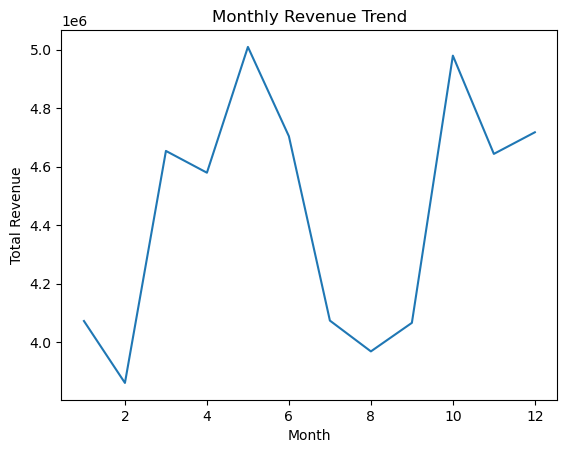

In [1041]:
# Group data by month and analyse monthly revenue
sns.lineplot(financial_df.groupby(by='pickup_month').aggregate(monthly_revenue = ('total_amount', 'sum')), x= 'pickup_month', 
            y = 'monthly_revenue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

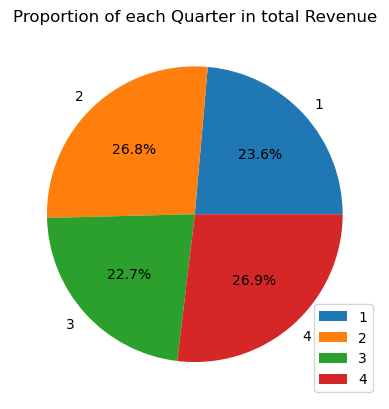

In [1753]:
# Calculate proportion of each quarter
financial_df.groupby(by=financial_df['tpep_pickup_datetime'].dt.quarter).aggregate(quarterly_revenue = (
    'total_amount', 'sum')).plot.pie(y='quarterly_revenue', autopct='%1.1f%%')
plt.title('Proportion of each Quarter in total Revenue')
# plt.legend().set_visible(False)
plt.ylabel('')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

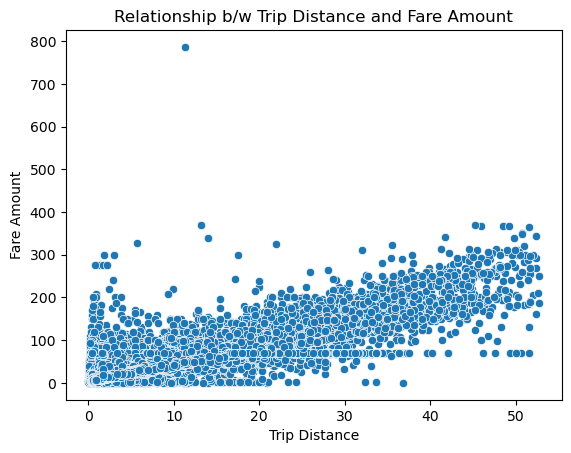

Correlation b/w Trip Distance and Fare Amount :  0.9518045277176268


In [1117]:
# Show how trip fare is affected by distance
positive_distance_df = df[df['trip_distance'] > 0]
sns.scatterplot(positive_distance_df, x = 'trip_distance', y = 'fare_amount')
plt.title('Relationship b/w Trip Distance and Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()
print('Correlation b/w Trip Distance and Fare Amount : ', positive_distance_df['trip_distance'].corr(positive_distance_df['fare_amount']))

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [1120]:
positive_distance_df['trip_duration_in_mins'] = (positive_distance_df['tpep_dropoff_datetime'] - positive_distance_df['tpep_pickup_datetime']).dt.total_seconds()/60

/var/folders/ym/j12v1nh543g5x4cy7th6jsk80000gn/T/ipykernel_1258/305482324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_distance_df['trip_duration_in_mins'] = (positive_distance_df['tpep_dropoff_datetime'] - positive_distance_df['tpep_pickup_datetime']).dt.total_seconds()/60


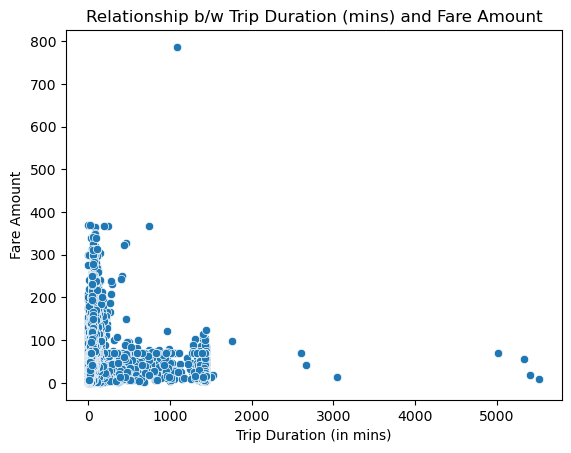

Correlation b/w Trip Duration and Fare Amount :  0.2832169272984602


In [1124]:
# Show relationship between fare and trip duration
sns.scatterplot(positive_distance_df, x = 'trip_duration_in_mins', y = 'fare_amount')
plt.title('Relationship b/w Trip Duration (mins) and Fare Amount')
plt.xlabel('Trip Duration (in mins)')
plt.ylabel('Fare Amount')
plt.show()
print('Correlation b/w Trip Duration and Fare Amount : ', positive_distance_df['trip_duration_in_mins'].corr(positive_distance_df['fare_amount']))

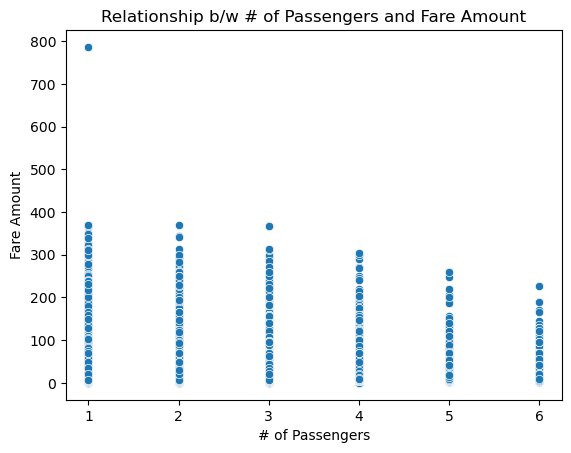

Correlation b/w # of Passengers and Fare Amount :  0.0396663539516139


In [1126]:
# Show relationship between fare and number of passengers
sns.scatterplot(positive_distance_df, x = 'passenger_count', y = 'fare_amount')
plt.title('Relationship b/w # of Passengers and Fare Amount')
plt.xlabel('# of Passengers')
plt.ylabel('Fare Amount')
plt.show()
print('Correlation b/w # of Passengers and Fare Amount : ', positive_distance_df['passenger_count'].corr(positive_distance_df['fare_amount']))

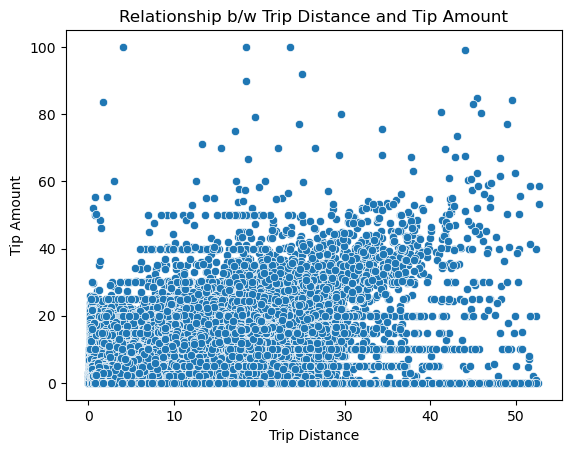

Correlation b/w Trip Distance and Tip Amount :  0.6087102995563561


In [1128]:
# Show relationship between tip and trip distance
sns.scatterplot(positive_distance_df, x = 'trip_distance', y = 'tip_amount')
plt.title('Relationship b/w Trip Distance and Tip Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.show()
print('Correlation b/w Trip Distance and Tip Amount : ', positive_distance_df['trip_distance'].corr(positive_distance_df['tip_amount']))

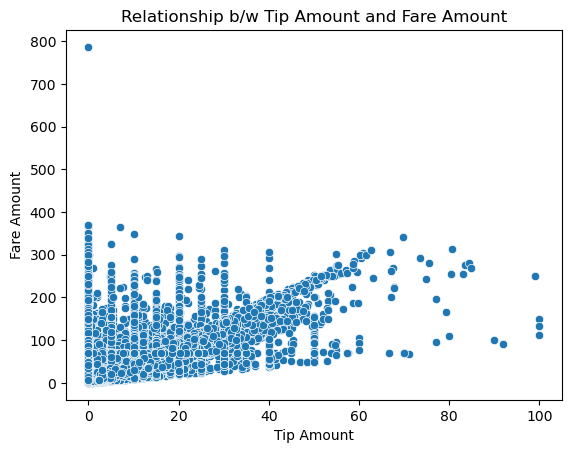

Correlation b/w Tip Amount and Fare Amount :  0.627488815418036


In [1755]:
sns.scatterplot(positive_distance_df, x = 'tip_amount', y = 'fare_amount')
plt.title('Relationship b/w Tip Amount and Fare Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Fare Amount')
plt.show()
print('Correlation b/w Tip Amount and Fare Amount : ', positive_distance_df['tip_amount'].corr(positive_distance_df['fare_amount']))

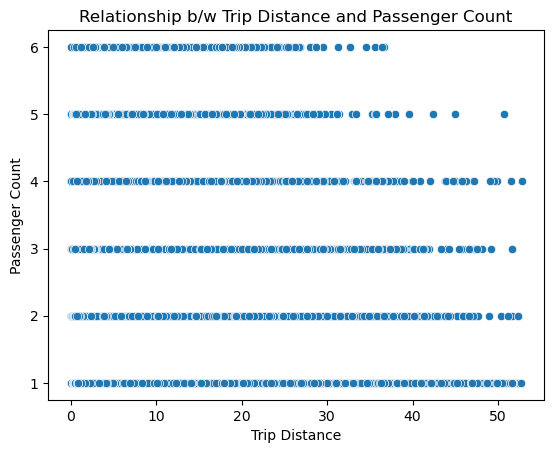

Correlation b/w Trip Distance and Passenger Count :  0.035624529470607805


In [1757]:
# Show relationship between passenger count and trip distance
sns.scatterplot(positive_distance_df, x = 'trip_distance', y = 'passenger_count')
plt.title('Relationship b/w Trip Distance and Passenger Count')
plt.xlabel('Trip Distance')
plt.ylabel('Passenger Count')
plt.show()
print('Correlation b/w Trip Distance and Passenger Count : ', positive_distance_df['trip_distance'].corr(positive_distance_df['passenger_count']))

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

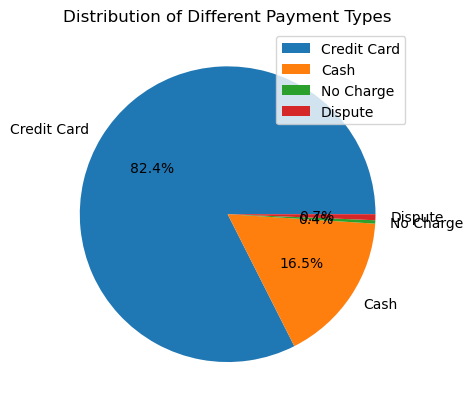

In [1763]:
# Analyse the distribution of different payment types (payment_type).
df.groupby(by='payment_type').aggregate(total_count = ('tpep_pickup_datetime', 'count')).plot.pie(y = 'total_count', labels=['Credit Card','Cash','No Charge','Dispute', 'Unknown', 'Void Trip'], autopct='%1.1f%%')
plt.title('Distribution of Different Payment Types')
plt.legend(['Credit Card','Cash','No Charge','Dispute', 'Unknown', 'Void Trip'])
plt.ylabel('')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [1152]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [1154]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/Users/vishvadeepak/Documents/upgrad/DatasetsAndDictionary/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

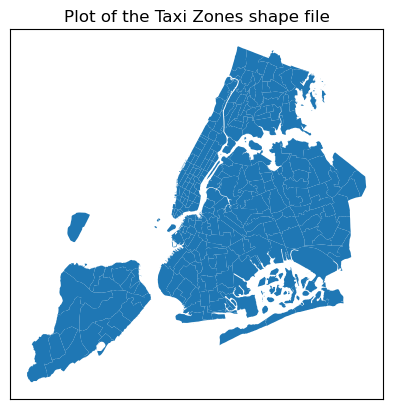

In [1767]:
# print(zones.info())
zones.plot()
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.title('Plot of the Taxi Zones shape file')
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [1162]:
# Merge zones and trip records using locationID and PULocationID
puLocation_merged_df = df.merge(right= zones, left_on='PULocationID', right_on='LocationID', how = 'inner')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [1166]:
# Group data by location and calculate the number of trips
location_id_df = puLocation_merged_df.groupby(by = 'PULocationID').aggregate(total_trips = ('tpep_pickup_datetime', 'count'))

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [1168]:
# Merge trip counts back to the zones GeoDataFrame
puLocation_count_gpd = zones.merge(right = location_id_df, how = 'left', right_on = 'PULocationID', left_on='LocationID')


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

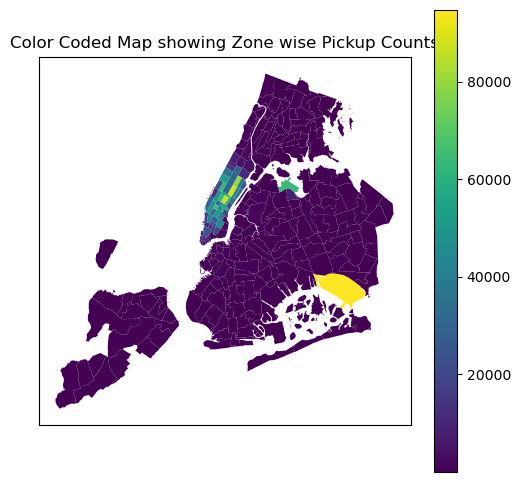

In [1769]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
puLocation_count_gpd.plot(ax = ax, column = 'total_trips', legend = True)
plt.title('Color Coded Map showing Zone wise Pickup Counts')
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

In [1771]:
puLocation_count_gpd.sort_values(by='total_trips', ascending=False)

OBJECTID  Shape_Leng  Shape_Area  \
131       132    0.245479    0.002038   
236       237    0.042213    0.000096   
160       161    0.035804    0.000072   
235       236    0.044252    0.000103   
161       162    0.035270    0.000048   
..        ...         ...         ...   
102       103    0.014306    0.000006   
103       104    0.021221    0.000012   
104       105    0.077425    0.000369   
109       110    0.103946    0.000526   
175       176    0.151995    0.000658   

                                              zone  LocationID        borough  \
131                                    JFK Airport         132         Queens   
236                          Upper East Side South         237      Manhattan   
160                                 Midtown Center         161      Manhattan   
235                          Upper East Side North         236      Manhattan   
161                                   Midtown East         162      Manhattan   
..                                             ...         ...            ...   
102  Governor's Island/Ellis Island/Liberty Island         103      Manhattan   
103  Governor's Island/Ellis Island/Liberty Island         103      Manhattan   
104  Governor's Island/Ellis Island/Liberty Island         103      Manhattan   
109                               Great Kills Park         110  Staten Island   
175                                        Oakwood         176  Staten Island   

                                              geometry  total_trips  
131  MULTIPOLYGON (((1032791.001 181085.006, 103283...      94718.0  
236  POLYGON ((993633.442 216961.016, 993507.232 21...      88159.0  
160  POLYGON ((991081.026 214453.698, 990952.644 21...      87119.0  
235  POLYGON ((995940.048 221122.92, 995812.322 220...      79349.0  
161  POLYGON ((992224.354 214415.293, 992096.999 21...      66370.0  
..                                                 ...          ...  
102  POLYGON ((972079.575 190732.429, 972184.766 19...          NaN  
103  POLYGON ((973172.666 194632.348, 973310.63 194...          NaN  
104  POLYGON ((979605.759 191880.575, 979978.435 19...          NaN  
109  POLYGON ((951420.092 139894.411, 951856.209 13...          NaN  
175  POLYGON ((950393.94 148827.195, 950393.983 148...          NaN  

[263 rows x 8 columns]

In [1187]:
# can you try displaying the zones DF sorted by the number of trips?
puLocation_count_gpd.sort_values(by = 'total_trips', ascending=False)

OBJECTID  Shape_Leng  Shape_Area  \
131       132    0.245479    0.002038   
236       237    0.042213    0.000096   
160       161    0.035804    0.000072   
235       236    0.044252    0.000103   
161       162    0.035270    0.000048   
..        ...         ...         ...   
102       103    0.014306    0.000006   
103       104    0.021221    0.000012   
104       105    0.077425    0.000369   
109       110    0.103946    0.000526   
175       176    0.151995    0.000658   

                                              zone  LocationID        borough  \
131                                    JFK Airport         132         Queens   
236                          Upper East Side South         237      Manhattan   
160                                 Midtown Center         161      Manhattan   
235                          Upper East Side North         236      Manhattan   
161                                   Midtown East         162      Manhattan   
..                                             ...         ...            ...   
102  Governor's Island/Ellis Island/Liberty Island         103      Manhattan   
103  Governor's Island/Ellis Island/Liberty Island         103      Manhattan   
104  Governor's Island/Ellis Island/Liberty Island         103      Manhattan   
109                               Great Kills Park         110  Staten Island   
175                                        Oakwood         176  Staten Island   

                                              geometry  total_trips  
131  MULTIPOLYGON (((1032791.001 181085.006, 103283...      94718.0  
236  POLYGON ((993633.442 216961.016, 993507.232 21...      88159.0  
160  POLYGON ((991081.026 214453.698, 990952.644 21...      87119.0  
235  POLYGON ((995940.048 221122.92, 995812.322 220...      79349.0  
161  POLYGON ((992224.354 214415.293, 992096.999 21...      66370.0  
..                                                 ...          ...  
102  POLYGON ((972079.575 190732.429, 972184.766 19...          NaN  
103  POLYGON ((973172.666 194632.348, 973310.63 194...          NaN  
104  POLYGON ((979605.759 191880.575, 979978.435 19...          NaN  
109  POLYGON ((951420.092 139894.411, 951856.209 13...          NaN  
175  POLYGON ((950393.94 148827.195, 950393.983 148...          NaN  

[263 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [1208]:
hourly_duration_locationId_df = df.groupby(by=['PULocationID', 'DOLocationID', 'pickup_hour']).aggregate(
    avg_duration_in_mins=('trip_duration_in_mins', 'mean'))
hourly_duration_locationId_df.reset_index(inplace=True)
hourly_duration_locationId_df.head()

PULocationID  DOLocationID  pickup_hour  avg_duration_in_mins
0             1             1            3              2.316667
1             1             1            6              5.783333
2             1             1            7              0.383333
3             1             1            9              4.850000
4             1             1           13              0.316667

In [1210]:
# Find routes which have the slowest speeds at different times of the day
df_with_hourly_loc = hourly_duration_locationId_df.merge(right=zones, left_on= 'PULocationID', right_on='LocationID', how='left')
df_with_hourly_loc = df_with_hourly_loc.merge(right=zones, left_on= 'DOLocationID', right_on='LocationID', 
                                              how='left', suffixes=('_pickup', '_dropoff'))

In [1212]:
def distance_bw_points(geom1, geom2):
    if geom1 is None or geom2 is None:
        return None
    return geom1.distance(geom2)/1000

In [1214]:
df_with_hourly_loc['distance_in_km'] = df_with_hourly_loc.apply(lambda x : distance_bw_points(x['geometry_pickup'], x['geometry_dropoff']), axis=1)

In [1220]:
df_with_hourly_loc['speed_in_kmph'] = df_with_hourly_loc['distance_in_km']/(df_with_hourly_loc['avg_duration_in_mins']/60)

In [1775]:
df_with_hourly_loc[df_with_hourly_loc['speed_in_kmph'] > 0].sort_values(by='speed_in_kmph')[['PULocationID', 'zone_pickup',
            'DOLocationID', 'zone_dropoff', 'pickup_hour', 'speed_in_kmph']].head()

PULocationID                        zone_pickup  DOLocationID  \
27482            77  East New York/Pennsylvania Avenue            63   
28820            79                       East Village           144   
45271           114            Greenwich Village South           148   
45276           114            Greenwich Village South           148   
45274           114            Greenwich Village South           148   

              zone_dropoff  pickup_hour  speed_in_kmph  
27482        Cypress Hills           18   5.710430e-07  
28820  Little Italy/NoLiTa           22   6.267174e-07  
45271      Lower East Side           13   1.354530e-06  
45276      Lower East Side           18   1.542021e-06  
45274      Lower East Side           16   1.606481e-06

In [1779]:
df_with_hourly_loc[df_with_hourly_loc['speed_in_kmph'] > 0].groupby(by=['zone_pickup', 'zone_dropoff']).aggregate(avg_speed = ('speed_in_kmph', 'mean')) \
    .sort_values(by='avg_speed')

avg_speed
zone_pickup                       zone_dropoff                         
East New York/Pennsylvania Avenue Cypress Hills            5.710430e-07
Greenwich Village South           Lower East Side          1.902749e-06
East Village                      Little Italy/NoLiTa      2.193696e-06
Lower East Side                   Greenwich Village South  2.246388e-06
Little Italy/NoLiTa               East Village             2.354849e-06
...                                                                 ...
Central Harlem North              Sheepshead Bay           3.026757e+03
Saint Michaels Cemetery/Woodside  JFK Airport              5.018607e+03
Long Island City/Hunters Point    Soundview/Castle Hill    5.032156e+03
Chinatown                         Mott Haven/Port Morris   5.514918e+03
Newark Airport                    East Village             2.025528e+04

[19325 rows x 1 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

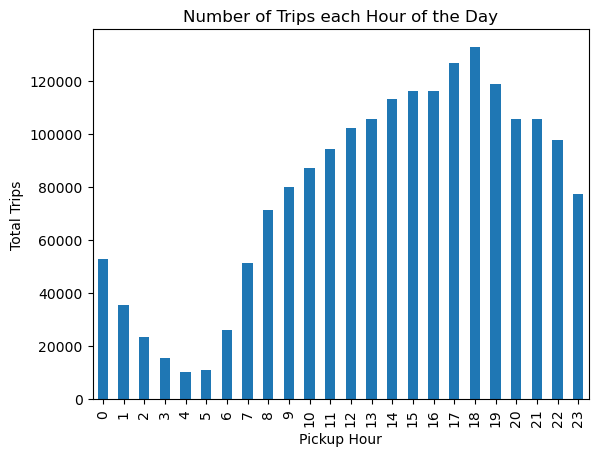

In [1241]:
# Visualise the number of trips per hour and find the busiest hour
df.groupby(by = 'pickup_hour').aggregate(total_count = ('tpep_pickup_datetime','count')).plot.bar()
plt.title('Number of Trips each Hour of the Day')
plt.xlabel('Pickup Hour')
plt.ylabel('Total Trips')
plt.legend().set_visible(False)
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [1245]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
top5BusiestHr_df = df.groupby(by = 'pickup_hour').aggregate(total_trips = ('tpep_pickup_datetime','count')).sort_values(
    by = 'total_trips', ascending=False).head(5)
top5BusiestHr_df['actual_total_trips'] = top5BusiestHr_df.apply(lambda x : x ['total_trips']/0.05, axis = 1)
top5BusiestHr_df[['actual_total_trips']]


actual_total_trips
pickup_hour                    
18                    2654560.0
17                    2530860.0
19                    2372300.0
15                    2321720.0
16                    2320420.0

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

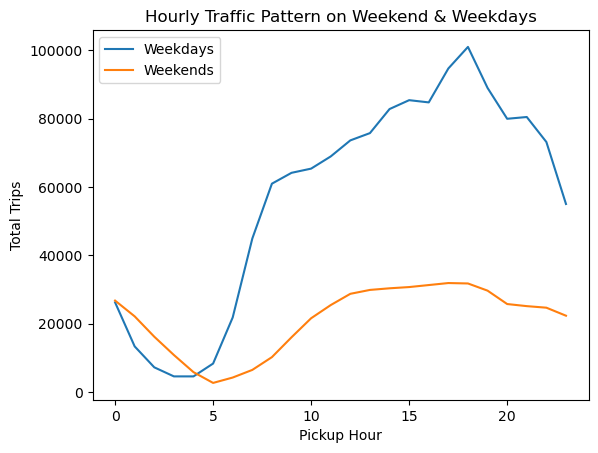

In [1265]:
# Compare traffic trends for the week days and weekends
weekday_hr_dist_df = df[df['pickup_weekday'].isin([0,1,2,3,4])].groupby(
    by = 'pickup_hour').aggregate(total_count = ('tpep_pickup_datetime','count'));
sns.lineplot(weekday_hr_dist_df, x = 'pickup_hour', y = 'total_count', label='Weekdays')

weekend_hr_dist_df = df[df['pickup_weekday'].isin([5, 6])].groupby(
    by = 'pickup_hour').aggregate(total_count = ('tpep_pickup_datetime','count'));
sns.lineplot(weekend_hr_dist_df, x = 'pickup_hour', y = 'total_count', label = 'Weekends')
plt.title('Hourly Traffic Pattern on Weekend & Weekdays')
plt.xlabel('Pickup Hour')
plt.ylabel('Total Trips')
# plt.legend(['f','q'])
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [1785]:
# Find top 10 pickup and dropoff zones
top10_pickup_zones = df.groupby(by=['pickup_hour', 'PULocationID']).aggregate(total_count=('tpep_pickup_datetime',
       'count')).reset_index().groupby('PULocationID').aggregate(avg_hourly_pickup=('total_count', 
       'mean')).sort_values(by='avg_hourly_pickup', ascending=False).head(10)
top10_dropoff_zones = df.groupby(by=['dropoff_hour', 'DOLocationID']).aggregate(total_count=('tpep_pickup_datetime',
       'count')).reset_index().groupby('DOLocationID').aggregate(avg_hourly_dropoff=('total_count', 
       'mean')).sort_values(by='avg_hourly_dropoff', ascending=False).head(10)
print(top10_pickup_zones.merge(right=zones, left_on='PULocationID', right_on='LocationID')[['zone', 'avg_hourly_pickup']])
print(top10_dropoff_zones.merge(right=zones, left_on='DOLocationID', right_on='LocationID')[['zone', 'avg_hourly_dropoff']])

                           zone  avg_hourly_pickup
0                   JFK Airport        3946.583333
1         Upper East Side South        3673.291667
2                Midtown Center        3629.958333
3         Upper East Side North        3306.208333
4                  Midtown East        2765.416667
5             LaGuardia Airport        2665.583333
6  Penn Station/Madison Sq West        2661.166667
7           Lincoln Square East        2600.708333
8     Times Sq/Theatre District        2583.791667
9                   Murray Hill        2314.750000
                        zone  avg_hourly_dropoff
0      Upper East Side North         3461.083333
1      Upper East Side South         3295.000000
2             Midtown Center         3049.291667
3  Times Sq/Theatre District         2394.750000
4                Murray Hill         2309.125000
5               Midtown East         2222.750000
6        Lincoln Square East         2197.750000
7      Upper West Side South         2192.37500

In [1631]:
print(df[~df['pickup_weekday'].isin([5,6])].groupby(by=['pickup_hour', 'PULocationID']).aggregate(total_count=('tpep_pickup_datetime',
       'count')).reset_index().groupby('PULocationID').aggregate(avg_hourly_pickup=('total_count', 
       'mean')).sort_values(by='avg_hourly_pickup', ascending=False).head(10).merge(
    right=zones, left_on = 'PULocationID', right_on = 'LocationID')[['avg_hourly_pickup', 'zone']])
print(df[df['pickup_weekday'].isin([5,6])].groupby(by=['pickup_hour', 'PULocationID']).aggregate(total_count=('tpep_pickup_datetime',
       'count')).reset_index().groupby('PULocationID').aggregate(avg_hourly_pickup=('total_count', 
       'mean')).sort_values(by='avg_hourly_pickup', ascending=False).head(10).merge(
    right=zones, left_on = 'PULocationID', right_on = 'LocationID')[['avg_hourly_pickup', 'zone']])

   avg_hourly_pickup                          zone
0        2912.083333         Upper East Side South
1        2906.166667                Midtown Center
2        2816.875000                   JFK Airport
3        2622.333333         Upper East Side North
4        2192.000000                  Midtown East
5        2036.000000             LaGuardia Airport
6        1967.208333  Penn Station/Madison Sq West
7        1902.041667     Times Sq/Theatre District
8        1889.291667           Lincoln Square East
9        1781.833333                   Murray Hill
   avg_hourly_pickup                          zone
0        1129.708333                   JFK Airport
1         831.750000                  East Village
2         761.208333         Upper East Side South
3         723.791667                Midtown Center
4         711.416667           Lincoln Square East
5         693.958333  Penn Station/Madison Sq West
6         683.875000         Upper East Side North
7         681.750000     Times 

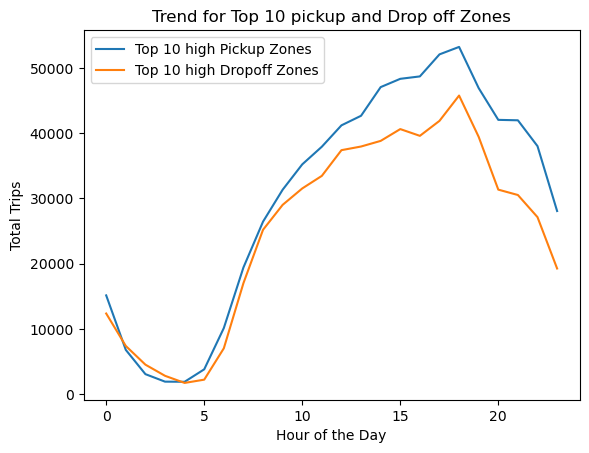

In [1606]:
hourly_for_top10_pickup_zones = df[df['PULocationID'].isin(top10_pickup_zones.index)].groupby(by = 'pickup_hour').aggregate(total_count=('tpep_pickup_datetime',
       'count'))
sns.lineplot(hourly_for_top10_pickup_zones, x='pickup_hour', y = 'total_count', label = 'Top 10 high Pickup Zones')
hourly_for_top10_dropoff_zones=df[df['DOLocationID'].isin(top10_dropoff_zones.index)].groupby(by = 'dropoff_hour').aggregate(total_count=('tpep_pickup_datetime',
       'count'))
sns.lineplot(hourly_for_top10_dropoff_zones, x='dropoff_hour', y = 'total_count', label = 'Top 10 high Dropoff Zones')
plt.title('Trend for Top 10 pickup and Drop off Zones')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Trips')
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [1313]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_df = df.groupby('PULocationID').aggregate(total_count=('tpep_pickup_datetime','count'))
dropoff_df = df.groupby('DOLocationID').aggregate(total_count=('tpep_pickup_datetime','count'))
PU_DO_df = pickup_df.merge(right=dropoff_df, how ='outer', left_on='PULocationID', right_on='DOLocationID', suffixes=('_pickup', '_dropoff'))
PU_DO_df['ratio'] = PU_DO_df['total_count_pickup']/PU_DO_df['total_count_dropoff']
print(PU_DO_df.sort_values(by='ratio', ascending=False).head(10))
print(PU_DO_df.sort_values(by='ratio', ascending=True).head(10))


     total_count_pickup  total_count_dropoff     ratio
69               8285.0                900.0  9.205556
127             94718.0              20813.0  4.550906
133             63974.0              24147.0  2.649356
181             63868.0              41028.0  1.556693
109             24985.0              18136.0  1.377647
42              31207.0              22781.0  1.369870
244             41671.0              31271.0  1.332577
157             66370.0              53346.0  1.244142
156             87119.0              73183.0  1.190427
99              30573.0              25743.0  1.187624
     total_count_pickup  total_count_dropoff     ratio
0                  36.0               5559.0  0.006476
246                 1.0                 32.0  0.031250
240                 1.0                 32.0  0.031250
151                 1.0                 28.0  0.035714
110                 1.0                 26.0  0.038462
105                 1.0                 26.0  0.038462
252       

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [1791]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] < 5)]
nightPickup_df = night_df.groupby('PULocationID').aggregate(total_count=('tpep_pickup_datetime','count'))
nightPickup_df.reset_index(inplace=True)
nightDropoff_df = night_df.groupby('DOLocationID').aggregate(total_count=('tpep_pickup_datetime','count'))
nightDropoff_df.reset_index(inplace=True)
print(nightPickup_df.sort_values(by ='total_count', ascending=False).merge(right=zones, left_on='PULocationID', \
    right_on='LocationID').head(10)[['zone', 'total_count']])
print(nightDropoff_df.sort_values(by ='total_count', ascending=False).merge(right=zones, left_on='DOLocationID', \
    right_on='LocationID').head(10)[['zone', 'total_count']])

                           zone  total_count
0                  East Village        16090
1                   JFK Airport        13134
2                  West Village        12916
3               Lower East Side        10016
4                  Clinton East        10001
5       Greenwich Village South         9081
6     Times Sq/Theatre District         7931
7  Penn Station/Madison Sq West         6340
8                 Midtown South         6192
9                  East Chelsea         6106
                            zone  total_count
0                   East Village         8491
1                   Clinton East         6896
2                    Murray Hill         6251
3                       Gramercy         5752
4                   East Chelsea         5702
5                Lenox Hill West         5350
6                 Yorkville West         5149
7                   West Village         4981
8                Lower East Side         4511
9  Sutton Place/Turtle Bay North         4420

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

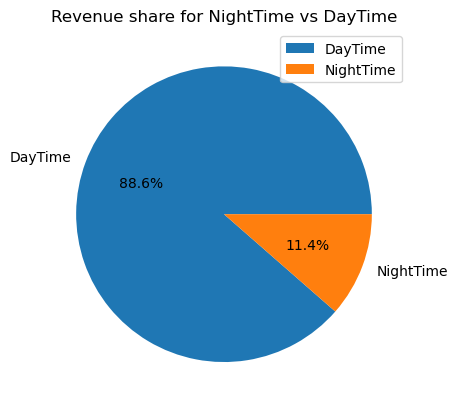

In [1793]:
# Filter for night hours (11 PM to 5 AM)
df['day_night'] = df['pickup_hour'].apply(lambda x : 'NightTime' if x>= 23 or x < 5 else 'DayTime')
df.groupby(by='day_night').aggregate(total_revenue = ('total_amount', 'sum')).plot.pie(y = 'total_revenue', autopct='%1.1f%%')
plt.title('Revenue share for NightTime vs DayTime')
plt.ylabel('')
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [1448]:
# since we have several records in our data frame where locationIDs are different but trip_distance == 0
# populating those records with zonal distance
# def distance_bw_points_in_miles(geom1, geom2):
#     # print(geom1)
#     # print(geom2)
#     if geom1 is None or geom2 is None:
#         return None
#     return geom1.distance(geom2)/1609.34

# distance_bw_points_in_miles(zones[zones['LocationID'] == 111].geometry.values[0],zones[zones['LocationID'] == 163].geometry.values[0])

In [1450]:
# pricing_df = df.merge(right=zones, left_on='PULocationID', right_on='LocationID', how = 'left').merge(
#     right = zones, left_on = 'DOLocationID', right_on='LocationID', how = 'left', suffixes=('_pickup', '_dropoff'))

In [1452]:
# pricing_df.head(10).apply(lambda x: distance_bw_points_in_miles(x['geometry_pickup'], x['geometry_dropoff']), axis = 1)

In [1454]:
pricing_df = df[df['trip_distance'] > 0]
pricing_df.shape

(1854235, 24)

In [1456]:
# Analyse the fare per mile per passenger for different passenger counts
pricing_df['fare_per_mile'] = pricing_df['fare_amount']/pricing_df['trip_distance']
avg_fare_pax_grp = pricing_df.groupby(by='passenger_count').aggregate(avg_fare_per_mile=('fare_per_mile', 'mean'))
avg_fare_pax_grp=avg_fare_pax_grp.reset_index()
avg_fare_pax_grp['avg_fare_per_mile_per_pax'] = avg_fare_pax_grp['avg_fare_per_mile']/avg_fare_pax_grp['passenger_count']
avg_fare_pax_grp



/var/folders/ym/j12v1nh543g5x4cy7th6jsk80000gn/T/ipykernel_1258/3168279509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pricing_df['fare_per_mile'] = pricing_df['fare_amount']/pricing_df['trip_distance']


passenger_count  avg_fare_per_mile  avg_fare_per_mile_per_pax
0              1.0           8.146043                   8.146043
1              2.0           8.015456                   4.007728
2              3.0           8.142398                   2.714133
3              4.0           8.213577                   2.053394
4              5.0           7.816503                   1.563301
5              6.0           7.994719                   1.332453

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [1458]:
# Compare the average fare per mile for different days and for different times of the day
print(pricing_df.groupby(by='pickup_hour').aggregate(avg_fare_per_mile=('fare_per_mile', 'mean')))
print(pricing_df.groupby(by='pickup_weekday').aggregate(avg_fare_per_mile=('fare_per_mile', 'mean')))


             avg_fare_per_mile
pickup_hour                   
0                     6.895453
1                     7.047238
2                     6.954939
3                     6.999356
4                     6.836741
5                     6.390065
6                     6.647107
7                     7.292574
8                     7.968826
9                     8.279698
10                    8.406213
11                    8.781236
12                    8.845583
13                    8.773358
14                    8.713903
15                    8.887337
16                    8.732792
17                    8.748816
18                    8.479966
19                    8.251292
20                    7.492707
21                    7.252266
22                    7.143232
23                    6.971592
                avg_fare_per_mile
pickup_weekday                   
0                        7.800925
1                        8.363948
2                        8.465706
3                       

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [1476]:
# Compare fare per mile for different vendors
pricing_df.groupby(by='VendorID').aggregate(avg_fare_per_mile = ('fare_per_mile', 'mean'))

avg_fare_per_mile
VendorID                   
1                  8.037552
2                  8.153094
6                  5.871735

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [1480]:
# Defining distance tiers
pricing_df['distance_tier'] = pd.cut(
    pricing_df['trip_distance'],
    bins=[-float('inf'), 2, 5, float('inf')],
    labels=['less than 2', 'b/w 2 and 5', 'more than 5']
)
pricing_df.groupby(by=['VendorID', 'distance_tier']).aggregate(avg_fare_per_mile = ('fare_per_mile', 'mean'))


/var/folders/ym/j12v1nh543g5x4cy7th6jsk80000gn/T/ipykernel_1258/3885888376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pricing_df['distance_tier'] = pd.cut(
/var/folders/ym/j12v1nh543g5x4cy7th6jsk80000gn/T/ipykernel_1258/3885888376.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pricing_df.groupby(by=['VendorID', 'distance_tier']).aggregate(avg_fare_per_mile = ('fare_per_mile', 'mean'))


avg_fare_per_mile
VendorID distance_tier                   
1        less than 2             9.760887
         b/w 2 and 5             6.383303
         more than 5             4.427251
2        less than 2            10.235808
         b/w 2 and 5             6.538786
         more than 5             4.490752
6        less than 2            38.122035
         b/w 2 and 5             8.227997
         more than 5             4.374723

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

/var/folders/ym/j12v1nh543g5x4cy7th6jsk80000gn/T/ipykernel_1258/7371553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pricing_df['tip_percentage'] = pricing_df['tip_amount']/pricing_df['total_amount']


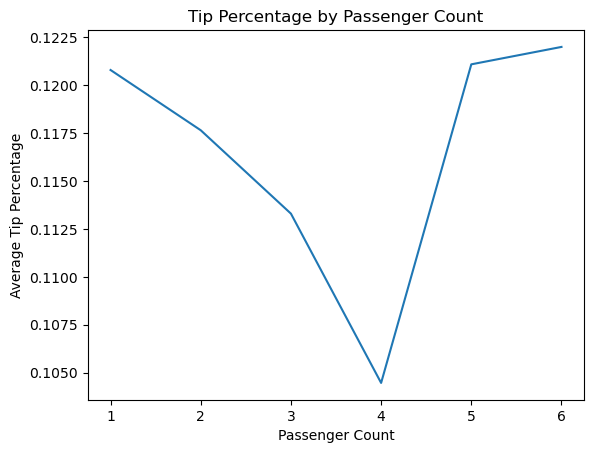

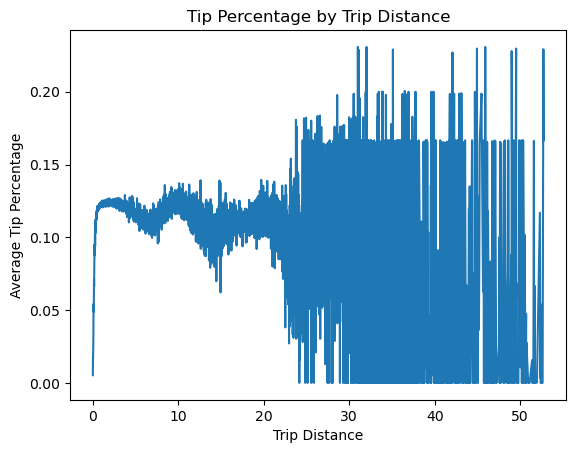

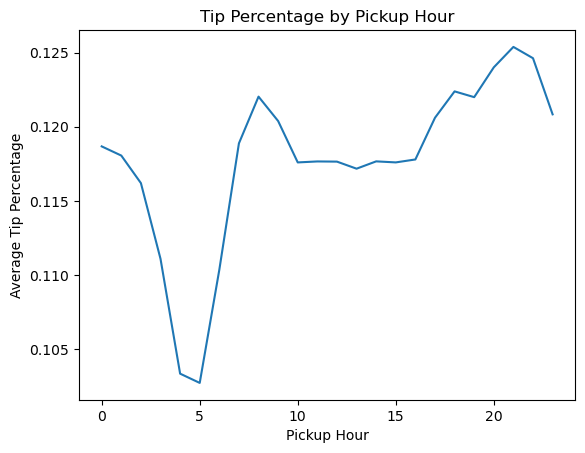

In [1486]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
pricing_df['tip_percentage'] = pricing_df['tip_amount']/pricing_df['total_amount']
# pricing_df = pricing_df[pricing_df['tip_percentage'] < 0.3]
sns.lineplot(pricing_df.groupby(by='passenger_count').aggregate(avg_tip_percent = ('tip_percentage', 'mean')))
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.title('Tip Percentage by Passenger Count')
plt.legend().set_visible(False)
plt.show()

sns.lineplot(pricing_df.groupby(by='trip_distance').aggregate(avg_tip_percent = ('tip_percentage', 'mean')))
plt.xlabel('Trip Distance')
plt.ylabel('Average Tip Percentage')
plt.title('Tip Percentage by Trip Distance')
plt.legend().set_visible(False)
plt.show()

sns.lineplot(pricing_df.groupby(by='pickup_hour').aggregate(avg_tip_percent = ('tip_percentage', 'mean')))
plt.xlabel('Pickup Hour')
plt.ylabel('Average Tip Percentage')
plt.title('Tip Percentage by Pickup Hour')
plt.legend().set_visible(False)
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

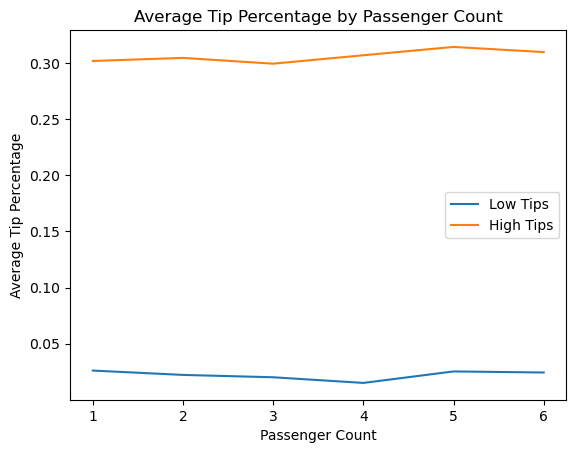

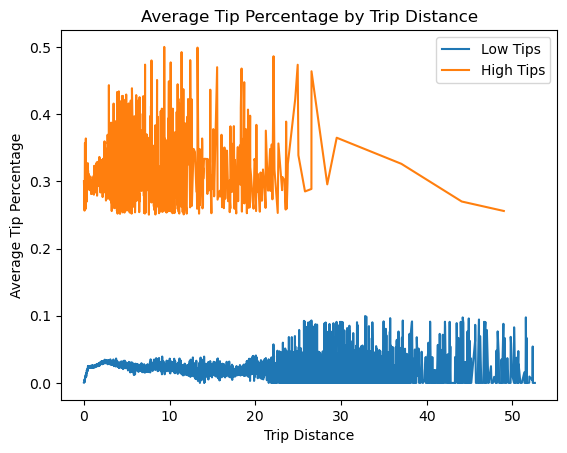

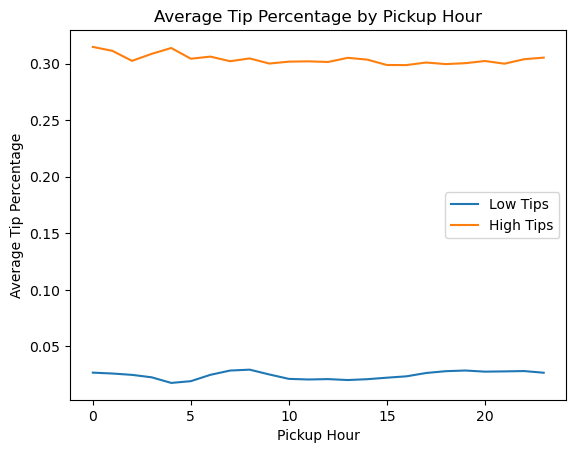

In [1504]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tip_df = pricing_df[pricing_df['tip_percentage'] < 0.1]
high_tip_df = pricing_df[pricing_df['tip_percentage'] > .25]
sns.lineplot(low_tip_df.groupby(by='passenger_count').aggregate(avg_tip_percent = ('tip_percentage', 'mean')), 
             x = 'passenger_count', y='avg_tip_percent', label='Low Tips')
sns.lineplot(high_tip_df.groupby(by='passenger_count').aggregate(avg_tip_percent = ('tip_percentage', 'mean')), 
             x = 'passenger_count', y='avg_tip_percent', label='High Tips')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.title('Average Tip Percentage by Passenger Count')
plt.show()
sns.lineplot(low_tip_df.groupby(by='trip_distance').aggregate(avg_tip_percent = ('tip_percentage', 'mean')), 
            x = 'trip_distance', y='avg_tip_percent', label='Low Tips')
sns.lineplot(high_tip_df.groupby(by='trip_distance').aggregate(avg_tip_percent = ('tip_percentage', 'mean')), 
            x = 'trip_distance', y='avg_tip_percent', label='High Tips')
plt.xlabel('Trip Distance')
plt.ylabel('Average Tip Percentage')
plt.title('Average Tip Percentage by Trip Distance')
plt.show()
sns.lineplot(low_tip_df.groupby(by='pickup_hour').aggregate(avg_tip_percent = ('tip_percentage', 'mean')),
            x = 'pickup_hour', y='avg_tip_percent', label='Low Tips')
sns.lineplot(high_tip_df.groupby(by='pickup_hour').aggregate(avg_tip_percent = ('tip_percentage', 'mean')), 
            x = 'pickup_hour', y='avg_tip_percent', label='High Tips')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Tip Percentage')
plt.title('Average Tip Percentage by Pickup Hour')
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

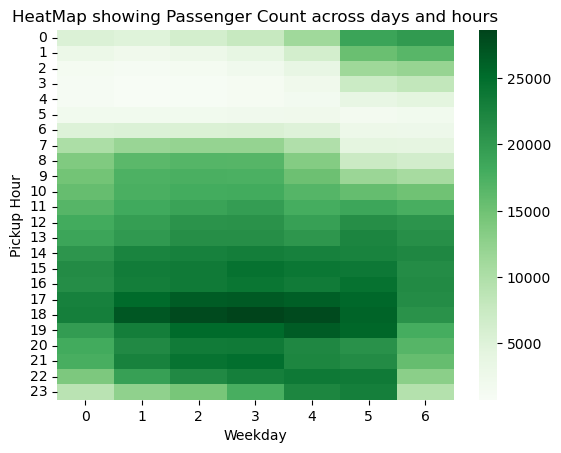

In [1508]:
# See how passenger count varies across hours and days
pivoted_df = df.pivot_table(values = 'passenger_count', columns= ['pickup_weekday'], index=['pickup_hour'], aggfunc='sum')
sns.heatmap(pivoted_df, cmap='Greens')
plt.title('HeatMap showing Passenger Count across days and hours')
plt.xlabel('Weekday')
plt.ylabel('Pickup Hour')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

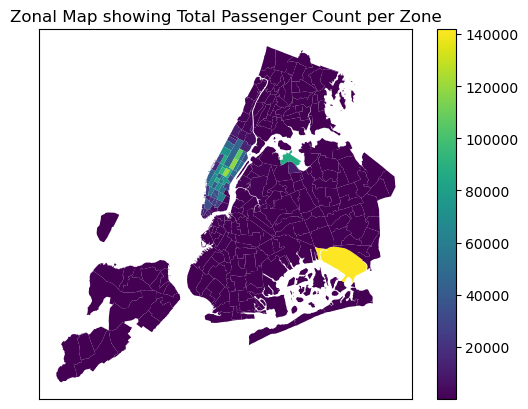

In [1512]:
# How does passenger count vary across zones
paxCount_per_location = df.groupby(by='PULocationID').aggregate(total_pax_count = ('passenger_count', 'sum'))
paxCount_per_zone = zones.merge(right=paxCount_per_location, left_on = 'LocationID', right_on='PULocationID', how = 'inner')
paxCount_per_zone.plot(column = 'total_pax_count', legend = True)
plt.title('Zonal Map showing Total Passenger Count per Zone')
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

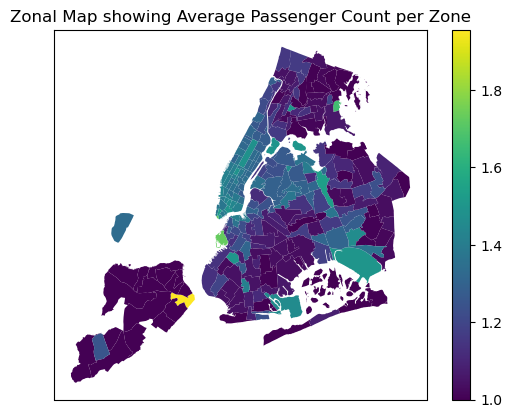

In [1518]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones_with_trips = df.groupby(by='PULocationID').aggregate(avg_pax_count = ('passenger_count', 'mean')).reset_index().merge(right=zones, 
                                                                                                          left_on='PULocationID', 
                                                                                                          right_on='LocationID', how = 'left')
zones_with_trips = gpd.GeoDataFrame(zones_with_trips, geometry='geometry')

zones_with_trips.plot(column = 'avg_pax_count', legend = True)
plt.title('Zonal Map showing Average Passenger Count per Zone')
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [1576]:
# How often is each surcharge applied?
df['has_extra'] = df[['mta_tax', 'improvement_surcharge','congestion_surcharge']].apply(lambda row : 
    any(x > 0 for x in row), axis = 1)


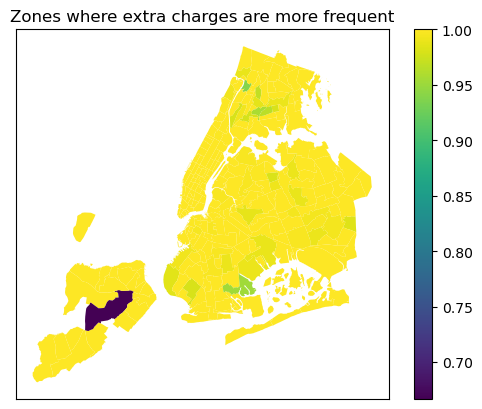

In [1584]:
extra_surcharge_zones = df.groupby(by='PULocationID').aggregate(total_count = ('tpep_pickup_datetime', 'count'), 
                                            extra_paid_count = ('has_extra', 'sum')).reset_index()
extra_surcharge_zones['extra_ratio'] = extra_surcharge_zones['extra_paid_count']/extra_surcharge_zones['total_count']
zones.merge(right=extra_surcharge_zones, left_on = 'LocationID', right_on='PULocationID', how = 'inner').plot(
    column = 'extra_ratio', legend=True)
plt.title('Zones where extra charges are more frequent')
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

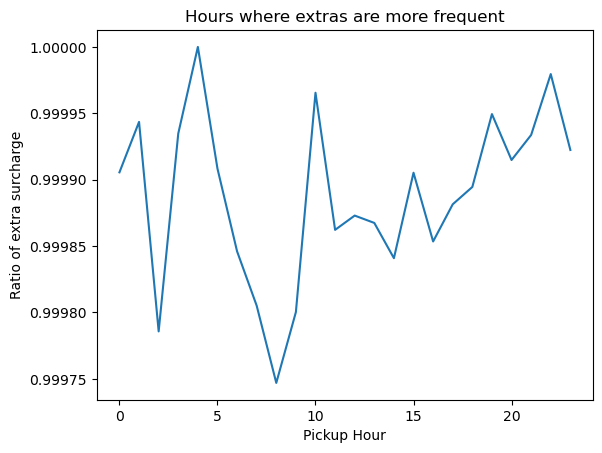

In [1594]:
extra_surcharge_hours = df.groupby(by='pickup_hour').aggregate(total_count = ('tpep_pickup_datetime', 'count'), 
                                            extra_paid_count = ('has_extra', 'sum')).reset_index()
extra_surcharge_hours['extra_ratio'] = extra_surcharge_hours['extra_paid_count']/extra_surcharge_hours['total_count']
sns.lineplot(data=extra_surcharge_hours, x = 'pickup_hour', y = 'extra_ratio')
plt.title('Hours where extras are more frequent')
plt.xlabel('Pickup Hour')
plt.ylabel('Ratio of extra surcharge')
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [1674]:
hourly_counts_weekday = df[~df['pickup_weekday'].isin([5,6])].groupby(['pickup_hour', 'PULocationID']).size().reset_index(name='count')
idx_weekday = hourly_counts_weekday.groupby('pickup_hour')['count'].idxmax()
top_zones_weekday = hourly_counts_weekday.loc[idx_weekday].sort_values('pickup_hour').reset_index(drop=True)
top_zones_weekday.merge(right = zones, left_on='PULocationID', right_on='LocationID', how = 'inner')[['pickup_hour', 'zone', 'count']]

pickup_hour                   zone  count
0             0            JFK Airport   2816
1             1            JFK Airport   1342
2             2           East Village    503
3             3           Clinton East    326
4             4           Clinton East    321
5             5            JFK Airport    859
6             6            JFK Airport   2277
7             7  Upper East Side North   2993
8             8  Upper East Side North   3981
9             9  Upper East Side North   3932
10           10  Upper East Side North   3870
11           11  Upper East Side South   4222
12           12  Upper East Side South   4689
13           13  Upper East Side South   4600
14           14  Upper East Side South   5203
15           15  Upper East Side North   5268
16           16         Midtown Center   5252
17           17         Midtown Center   5895
18           18         Midtown Center   6171
19           19         Midtown Center   5541
20           20         Midtown Center   4866
21           21         Midtown Center   4609
22           22            JFK Airport   4530
23           23            JFK Airport   4154

In [1680]:
hourly_counts_weekend = df[df['pickup_weekday'].isin([5,6])].groupby(['pickup_hour', 'PULocationID']).size().reset_index(name='count')
idx_weekend = hourly_counts_weekend.groupby('pickup_hour')['count'].idxmax()
top_zones_weekend = hourly_counts_weekend.loc[idx_weekend].sort_values('pickup_hour').reset_index(drop=True)
top_zones_weekend.merge(right = zones, left_on='PULocationID', right_on='LocationID', how = 'inner')[['pickup_hour', 'zone', 'count']]

pickup_hour                       zone  count
0             0               East Village   2480
1             1               East Village   2657
2             2               East Village   2107
3             3               East Village   1416
4             4               East Village    621
5             5                JFK Airport    293
6             6                JFK Airport    721
7             7                JFK Airport    736
8             8                JFK Airport    667
9             9  Times Sq/Theatre District    715
10           10      Upper East Side South    978
11           11      Upper East Side North   1158
12           12      Upper East Side North   1388
13           13      Upper East Side South   1443
14           14                JFK Airport   1659
15           15                JFK Airport   1898
16           16                JFK Airport   1875
17           17                JFK Airport   1710
18           18                JFK Airport   1590
19           19                JFK Airport   1804
20           20                JFK Airport   1842
21           21                JFK Airport   1941
22           22                JFK Airport   2077
23           23                JFK Airport   1927

In [1683]:
# for optimizing routing and dispatching, we need to do the following
# During weekends a lot of ppl are travelling, hence there is a lot of traffic at JFK Airport from 2pm till midnight and then 
# from 5am till 8am, so lot more cabs might be required at these places. Similarily East Village is also seeing a lot of traffic 
# till 4am, most probably because of having happening night life.
# Upper East Side South/North are tourism places hence they are also seeing traffic during afternoon on weekends.


# During weekdays 7am to 9pm, traffic is primarily present in Upper East Side South/North and Midtown Center, because these places have 
# schools as well as office places. JFK Airport still seems crowded 10pm to 2am, may be because flights are cheaper at this time
# and East Village, will be having night life, hence we see traffic around 2am. So we should increase cab frequency at these places at 
# these times

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
# During weekends a lot of ppl are travelling, hence there is a lot of traffic at JFK Airport from 2pm till midnight and then 
# from 5am till 8am, so lot more cabs might be required at these places. Similarily East Village is also seeing a lot of traffic 
# till 4am, most probably because of having happening night life.
# Upper East Side South/North are tourism places hence they are also seeing traffic during afternoon on weekends.


# During weekdays 7am to 9pm, traffic is primarily present in Upper East Side South/North and Midtown Center, because these places have 
# schools as well as office places. JFK Airport still seems crowded 10pm to 2am, may be because flights are cheaper at this time
# and East Village, will be having night life, hence we see traffic around 2am. So we should increase cab frequency at these places at 
# these times

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
# Vendor ID 2 has high prices for almost all the tiers as compared to Vendor ID 1, but still the number of trips
# for Vendor ID 2 are almost triple of vendorId 1, hence VendorID 2 need not change it's pricing. But vendorID 6, needs
# to decrease it's pricing drastically for less than 2 miles since it's very high and it also has less number of trips.
# Vendor 6 overall has reduced pricing but it needs to revisit less than 5 miles

In [1685]:
pricing_df.groupby(by='VendorID').aggregate(total_count = ('fare_per_mile', 'count'))

total_count
VendorID             
1              483958
2             1369910
6                 367

In [1738]:
pricing_df.groupby(by=['VendorID', 'day_night']).aggregate(avg_fare_per_mile = ('fare_per_mile', 'mean'))

avg_fare_per_mile
VendorID day_night                   
1        DayTime             8.177621
         NightTime           6.753574
2        DayTime             8.306349
         NightTime           7.019239
6        DayTime             5.904477
         NightTime           4.980141

In [1736]:
pricing_df.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
VendorID                                                               
1         2023-06-01 00:25:11   2023-06-01 00:28:50              1.0   
1         2023-06-01 00:49:00   2023-06-01 01:02:09              1.0   
2         2023-06-01 00:19:11   2023-06-01 00:32:13              5.0   
2         2023-06-01 00:22:21   2023-06-01 00:42:06              5.0   
2         2023-06-01 00:06:20   2023-06-01 00:31:41              1.0   

          trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
VendorID                                                                        
1                  0.80         1.0           113           211             2   
1                  5.60         1.0           132           197             2   
2                  4.99         1.0           141             4             1   
2                  6.60         1.0           170            97             1   
2                  7.02         1.0           263           243             1   

          fare_amount  extra  ...  airport_fee  pickup_hour  dropoff_hour  \
VendorID                      ...                                           
1                 5.8   3.50  ...         0.00            0             0   
1                24.0   2.75  ...         1.75            0             1   
2                22.6   1.00  ...         0.00            0             0   
2                30.3   1.00  ...         0.00            0             0   
2                33.8   1.00  ...         0.00            0             0   

          pickup_weekday  pickup_month  trip_duration_in_mins  day_night  \
VendorID                                                                   
1                      3             6               3.650000  NightTime   
1                      3             6              13.150000  NightTime   
2                      3             6              13.033333  NightTime   
2                      3             6              19.750000  NightTime   
2                      3             6              25.350000  NightTime   

          fare_per_mile  distance_tier  tip_percentage  
VendorID                                                
1              7.250000    less than 2        0.000000  
1              4.285714    more than 5        0.000000  
2              4.529058    b/w 2 and 5        0.166667  
2              4.590909    more than 5        0.199909  
2              4.814815    more than 5        0.166667  

[5 rows x 26 columns]